<a href="https://colab.research.google.com/github/LOVELYVD/AURDINO/blob/main/ML_TECHNIQUES_IN__TRADB_FILE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [7]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/ae_db/tr_data.csv')

In [8]:
df.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,Samples,DataFormat,Data
0,1,0,1,0,2,1,0,0,2000000,1024,2,fLaC�
1,2,0,2,0,2,2,0,0,2000000,1024,2,fLaC�
2,3,1024,3,0,2,1,0,0,2000000,1024,2,fLaC�
3,4,1024,4,0,2,2,0,0,2000000,1024,2,fLaC�
4,5,2048,5,0,2,1,0,0,2000000,1024,2,fLaC�


In [9]:
df.shape

(218861, 12)

In [17]:
print(df['Time'].unique())
print(df['TRAI'].unique())
print(df['Status'].unique())
print(df['Chan'].unique())

[        0      1024      2048 ... 114053248 114054272 114055296]
[     1      2      3 ... 218859 218860 218861]
[0]
[1 2]


In [18]:
df.isnull().sum()

SetID         0
Time          0
TRAI          0
Status        0
ParamID       0
Chan          0
Pretrigger    0
Thr           0
SampleRate    0
Samples       0
DataFormat    0
Data          0
dtype: int64

In [19]:
df.describe()


,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,Samples,DataFormat
count,218861.00000,2.188610e+05,218861.00000,218861.0,218861.0,218861.000000,218861.0,218861.0,218861.0,218861.0,218861.0
mean,109431.00000,5.798929e+07,109431.00000,0.0,2.0,1.499998,0.0,0.0,2000000.0,1024.0,2.0
std,63179.87297,3.241306e+07,63179.87297,0.0,0.0,0.500001,0.0,0.0,0.0,0.0,0.0
min,1.00000,0.000000e+00,1.00000,0.0,2.0,1.000000,0.0,0.0,2000000.0,1024.0,2.0
25%,54716.00000,3.001254e+07,54716.00000,0.0,2.0,1.000000,0.0,0.0,2000000.0,1024.0,2.0
50%,109431.00000,5.802714e+07,109431.00000,0.0,2.0,1.000000,0.0,0.0,2000000.0,1024.0,2.0
75%,164146.00000,8.604070e+07,164146.00000,0.0,2.0,2.000000,0.0,0.0,2000000.0,1024.0,2.0
max,218861.00000,1.140553e+08,218861.00000,0.0,2.0,2.000000,0.0,0.0,2000000.0,1024.0,2.0


In [22]:
final_dataset=df[['SetID','Time','TRAI','Status','ParamID','Chan','Pretrigger','Thr','SampleRate','Samples','DataFormat','Data']]

In [23]:
final_dataset.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,Samples,DataFormat,Data
0,1,0,1,0,2,1,0,0,2000000,1024,2,fLaC�
1,2,0,2,0,2,2,0,0,2000000,1024,2,fLaC�
2,3,1024,3,0,2,1,0,0,2000000,1024,2,fLaC�
3,4,1024,4,0,2,2,0,0,2000000,1024,2,fLaC�
4,5,2048,5,0,2,1,0,0,2000000,1024,2,fLaC�


In [35]:
final_dataset['CurrentSamples']=1024	

In [36]:
final_dataset.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,Samples,DataFormat,Data,CurrentSampleRate,n0_samplerate,CurrentSamples
0,1,1024,1,0,2,1,0,0,2000000,1024,2,fLaC�,2000000,0,1024
1,2,1024,2,0,2,2,0,0,2000000,1024,2,fLaC�,2000000,0,1024
2,3,1024,3,0,2,1,0,0,2000000,1024,2,fLaC�,2000000,0,1024
3,4,1024,4,0,2,2,0,0,2000000,1024,2,fLaC�,2000000,0,1024
4,5,1024,5,0,2,1,0,0,2000000,1024,2,fLaC�,2000000,0,1024


In [37]:
final_dataset['n0_samples']=final_dataset['CurrentSamples']- final_dataset['Samples']

In [38]:
final_dataset.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,Samples,DataFormat,Data,CurrentSampleRate,n0_samplerate,CurrentSamples,n0_samples
0,1,1024,1,0,2,1,0,0,2000000,1024,2,fLaC�,2000000,0,1024,0
1,2,1024,2,0,2,2,0,0,2000000,1024,2,fLaC�,2000000,0,1024,0
2,3,1024,3,0,2,1,0,0,2000000,1024,2,fLaC�,2000000,0,1024,0
3,4,1024,4,0,2,2,0,0,2000000,1024,2,fLaC�,2000000,0,1024,0
4,5,1024,5,0,2,1,0,0,2000000,1024,2,fLaC�,2000000,0,1024,0


In [40]:
final_dataset.drop(['n0_samplerate'],axis=1,inplace=True)


In [41]:

final_dataset.drop(['Samples'],axis=1,inplace=True)

In [42]:

final_dataset.drop(['CurrentSampleRate'],axis=1,inplace=True)

In [43]:

final_dataset.drop(['CurrentSamples'],axis=1,inplace=True)

In [44]:
final_dataset.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,DataFormat,Data,n0_samples
0,1,1024,1,0,2,1,0,0,2000000,2,fLaC�,0
1,2,1024,2,0,2,2,0,0,2000000,2,fLaC�,0
2,3,1024,3,0,2,1,0,0,2000000,2,fLaC�,0
3,4,1024,4,0,2,2,0,0,2000000,2,fLaC�,0
4,5,1024,5,0,2,1,0,0,2000000,2,fLaC�,0


In [45]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [46]:
final_dataset.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,DataFormat,n0_samples
0,1,1024,1,0,2,1,0,0,2000000,2,0
1,2,1024,2,0,2,2,0,0,2000000,2,0
2,3,1024,3,0,2,1,0,0,2000000,2,0
3,4,1024,4,0,2,2,0,0,2000000,2,0
4,5,1024,5,0,2,1,0,0,2000000,2,0


In [47]:
final_dataset.head()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,DataFormat,n0_samples
0,1,1024,1,0,2,1,0,0,2000000,2,0
1,2,1024,2,0,2,2,0,0,2000000,2,0
2,3,1024,3,0,2,1,0,0,2000000,2,0
3,4,1024,4,0,2,2,0,0,2000000,2,0
4,5,1024,5,0,2,1,0,0,2000000,2,0


In [48]:
final_dataset.corr()

,SetID,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,DataFormat,n0_samples
SetID,1.000000e+00,NaN,1.000000e+00,NaN,NaN,1.520694e-18,NaN,NaN,NaN,NaN,NaN
Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRAI,1.000000e+00,NaN,1.000000e+00,NaN,NaN,1.520694e-18,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ParamID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chan,1.520694e-18,NaN,1.520694e-18,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN
Pretrigger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SampleRate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DataFormat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
import seaborn as sns

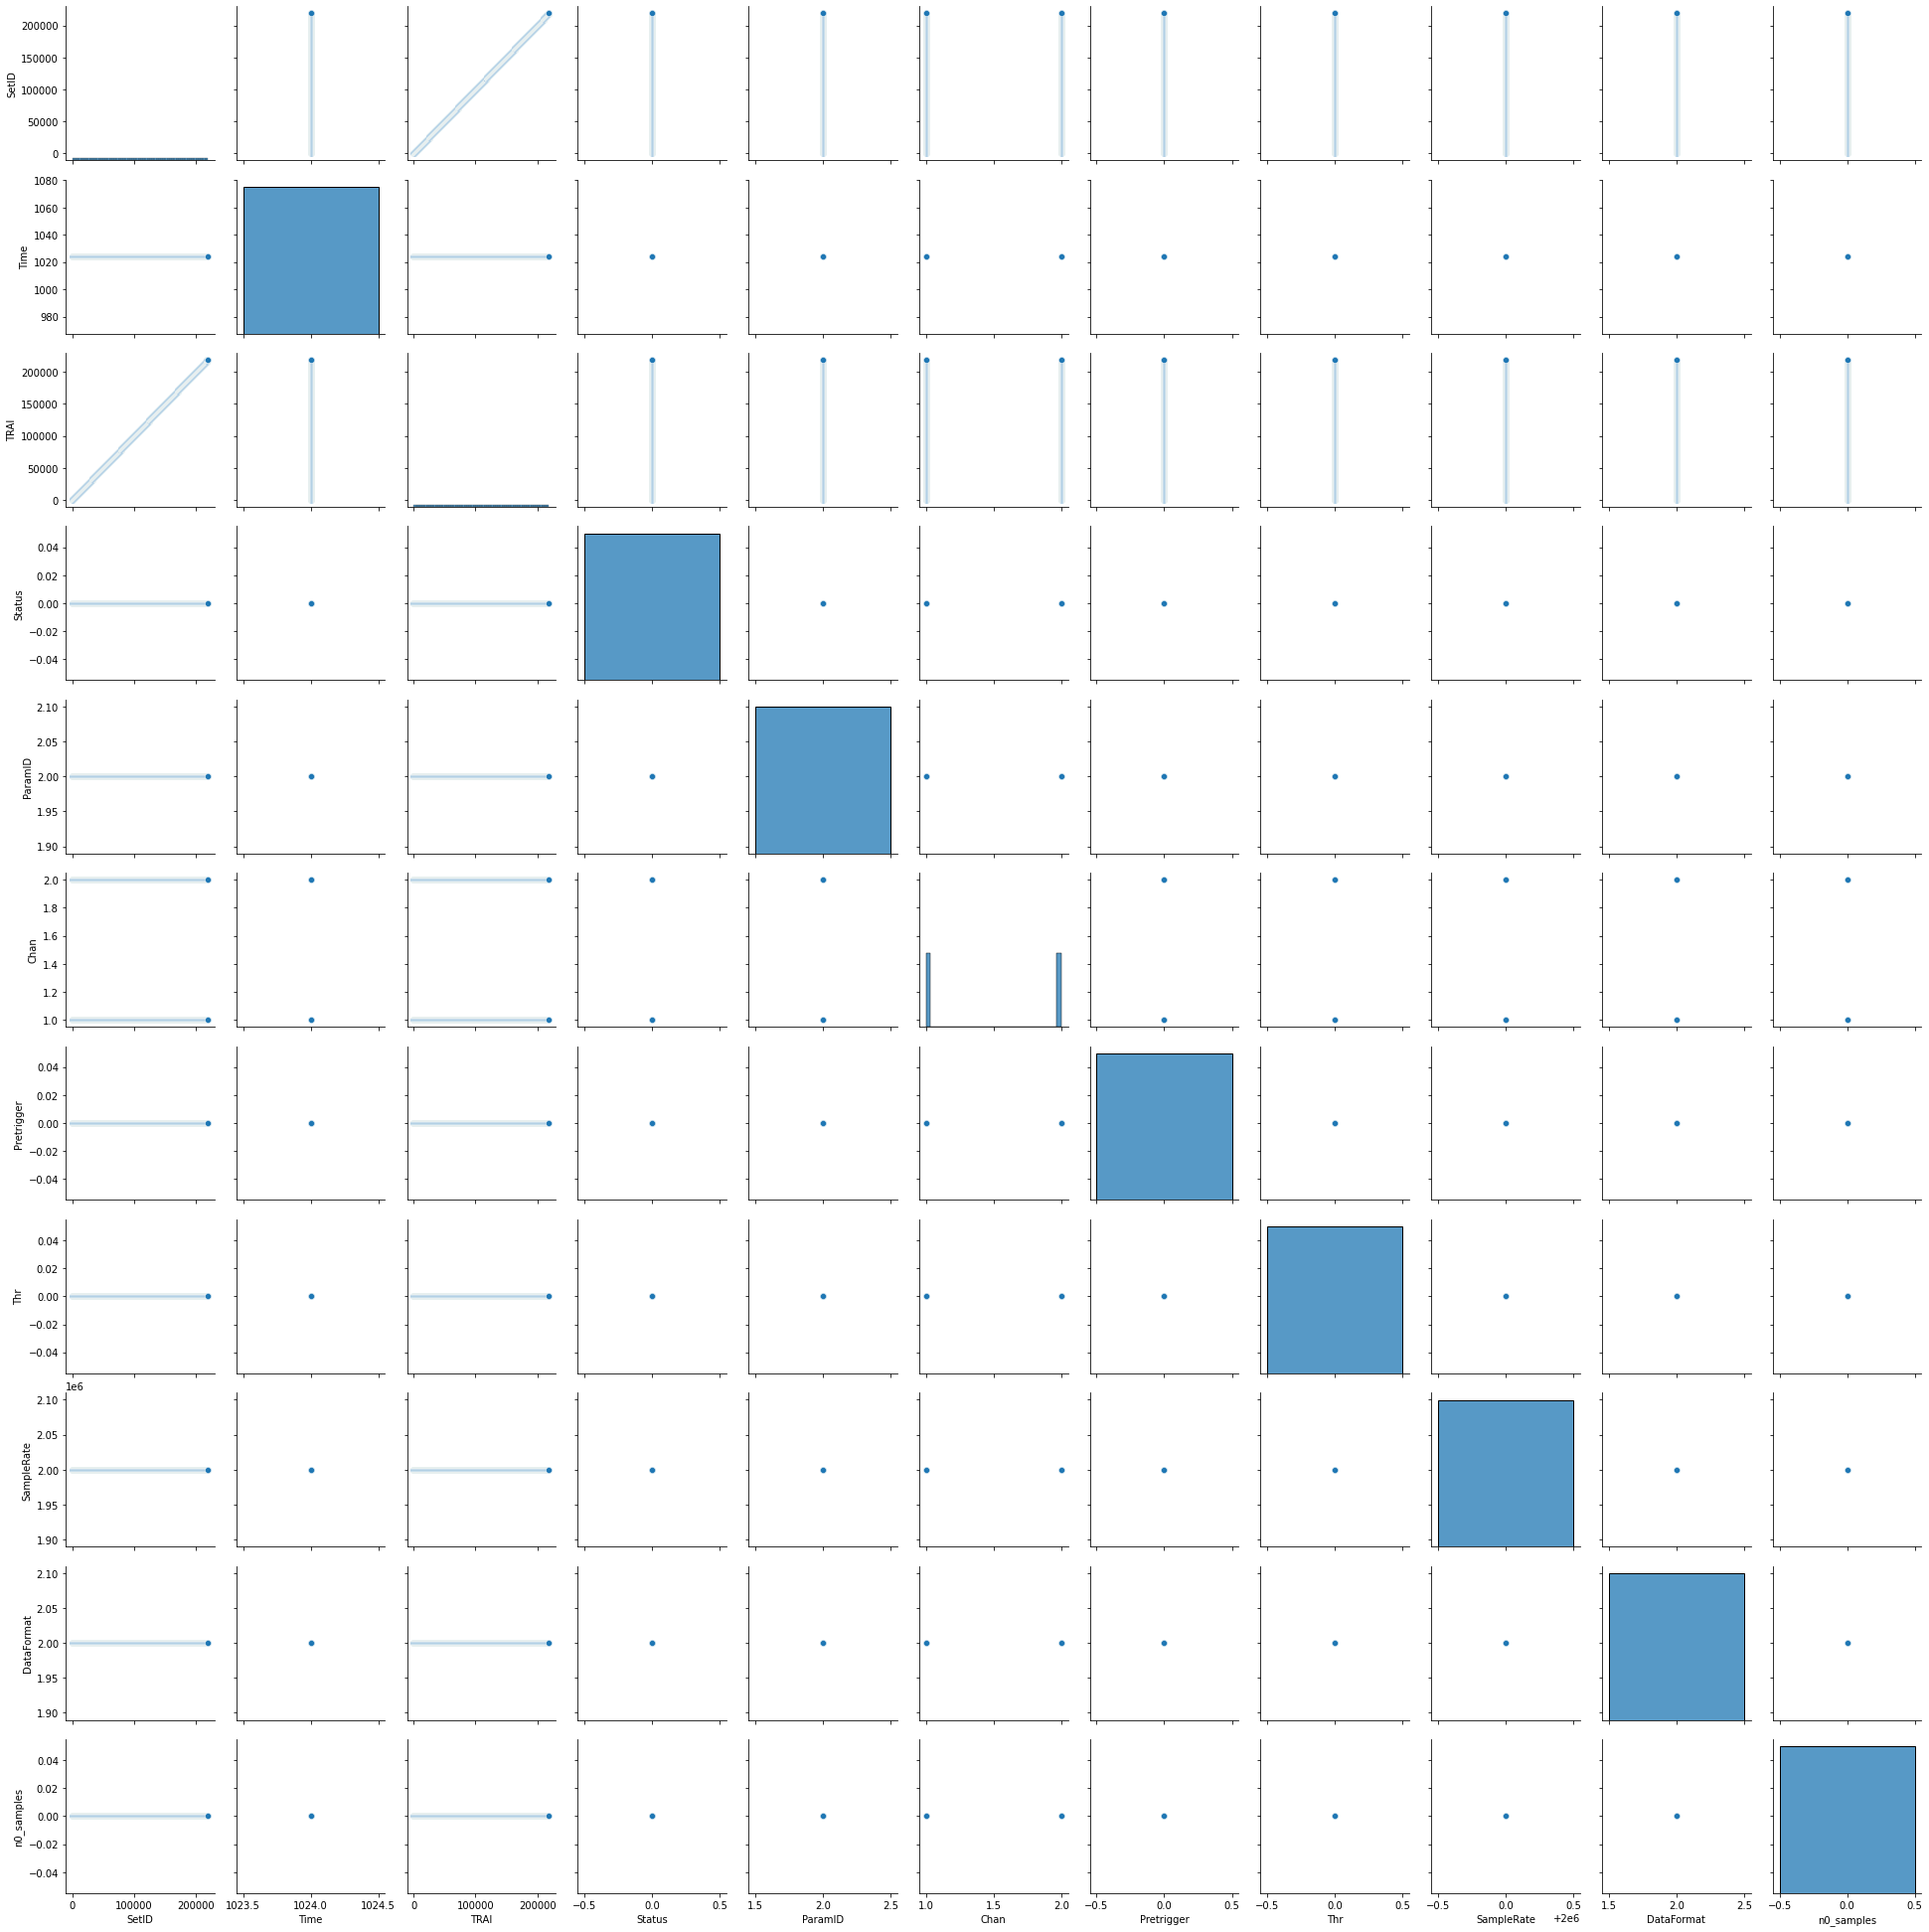

In [50]:
sns.pairplot(final_dataset)

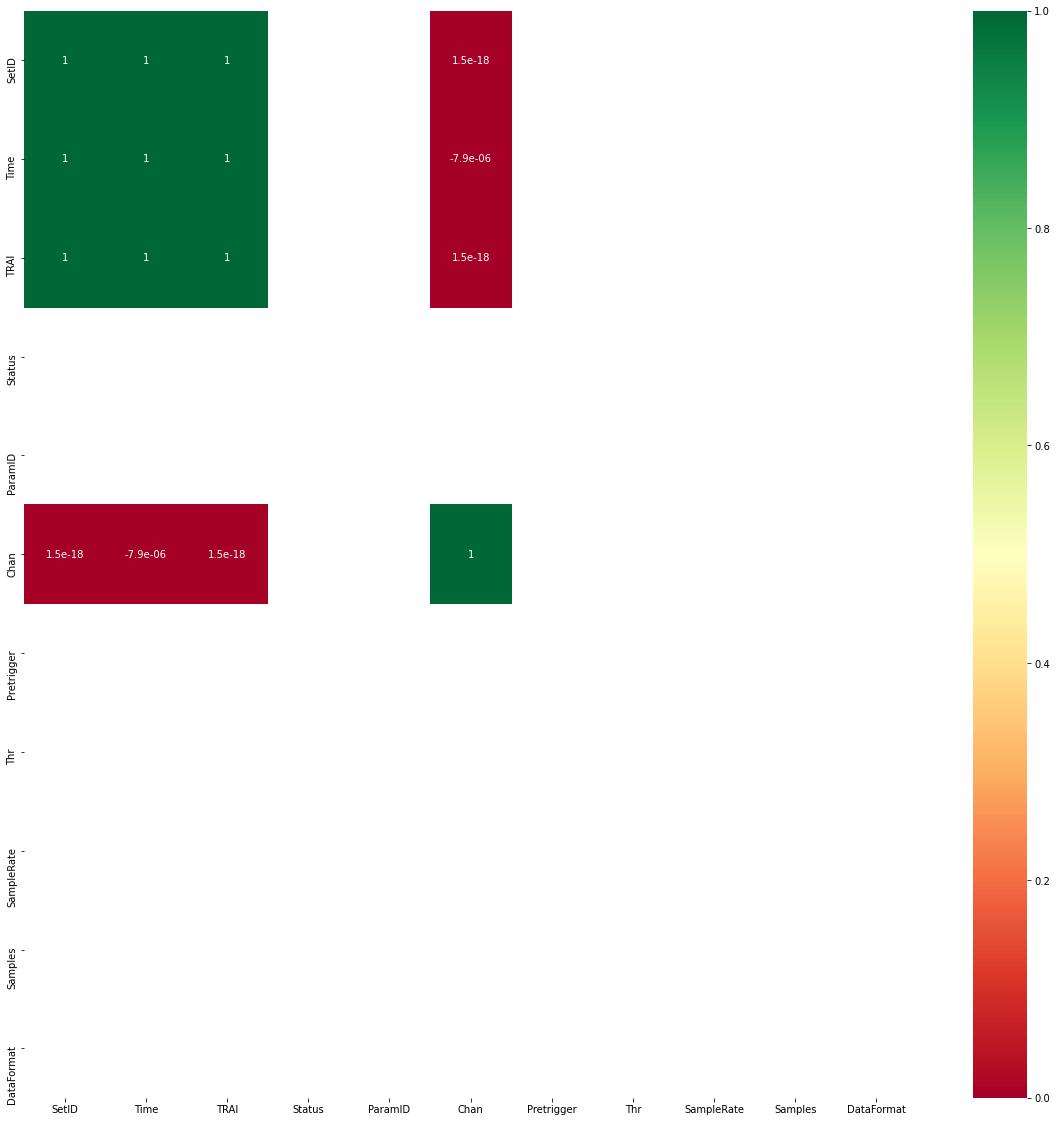

In [56]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [51]:
X=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [52]:
X['Chan'].unique()

array([1, 2])

In [53]:
X.head()

,Time,TRAI,Status,ParamID,Chan,Pretrigger,Thr,SampleRate,DataFormat,n0_samples
0,1024,1,0,2,1,0,0,2000000,2,0
1,1024,2,0,2,2,0,0,2000000,2,0
2,1024,3,0,2,1,0,0,2000000,2,0
3,1024,4,0,2,2,0,0,2000000,2,0
4,1024,5,0,2,1,0,0,2000000,2,0


In [54]:
y.head()

0    1
1    2
2    3
3    4
4    5
Name: SetID, dtype: int64

In [55]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [57]:
print(model.feature_importances_)

[0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
 2.08777894e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


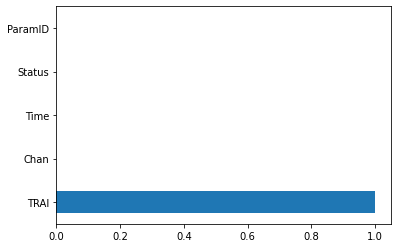

In [58]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
regressor=RandomForestRegressor()

In [67]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 0, stop = 1200000, num = 12)]
print(n_estimators)

[0, 109090, 218181, 327272, 436363, 545454, 654545, 763636, 872727, 981818, 1090909, 1200000]


In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [70]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [71]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [72]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.2min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.1min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.2min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total= 2.1min
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


In [ ]:
rf_random.best_params_

In [ ]:
rf_random.best_score_

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
rint('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)